Привет! Ты теперь находишься на территории код-ревьюеров. У нас тут своя атмосфера и правила:  
1. Меня зовут Алексей Свирин. Я работаю продуктовым аналитиком, поэтому мои комментарии больше ориентированы на визуальную и смысловую часть проекта, которая предназначена для внешних пользователей твоего проекта, и меньше на сам код, его чистоту и оптимизацию.  
2. Общаемся на ты.  
3. Хочешь мне написать — пиши. Только нужно выбрать свой цвет для комментария.  
4. Это учебный проект, тут можно не бояться сделать ошибку, но все остальное как в жизни, может быть сложно.  
5. У тебя бесконечное количество ~~жизней~~ попыток для сдачи проекта.  
6. Поехали!  

---

Я буду красить комментарии цветом, пожалуйста, не удаляй их:

<div class="alert alert-block alert-danger">
    

__Комментарий от ревьюера №1__

Такой комментарий нужно исправить обязательно, он критически влияет на удачное выполнение проекта.
</div>
    
---

<div class="alert alert-block alert-warning">
    

__Комментарий от ревьюера №1__


Такой комментарий является рекомендацией или советом. Можешь использовать их на своё усмотрение.
</div>

---

<div class="alert alert-block alert-success">
    

__Комментарий от ревьюера №1__

Такой комментарий  говорит о том, что было сделано что-то качественное и правильное =)
</div>

---

<div class="alert alert-block alert-info">
    

__Комментарий от ревьюера №1__

В проекте нужно будет поработать над графиками, выводами, описанием проекта и поискать еще проблемы в наших данных.
</div>

<div class="alert alert-block alert-info">
    

__Комментарий от ревьюера №2__

Привет, проект хорошо поправлен, правильно проведен А/Б-тест, найдены самые интересные гипотезы и аномальные значения, построены кумулятивные метрики и графики. По выводам тоже всё хорошо. Проект принят!
</div>

<div class="alert alert-block alert-info">
    

__Комментарий от ревьюера по новому проекту__

Следующий проект будет связан с геоданными. До него мы можешь изучить/покрутить/посмотреть разные модули, которые смогут помочь в выполнении работы:  
— модуль folium для визуализации геоданных на карте — https://dev-gang.ru/article/interaktivnaja-vizualizacija-geo-dannyh-na-python-9yqzq8qlud/  
— модуль для сервиса Геокодер от Яндекса: https://pypi.org/project/yandex-geocoder/  
— модуль для сервиса замечательной российской компании Dadata: https://pypi.org/project/dadata/  
    
Так же в новом проекте будет задание по составлению презентации, для него ты можешь пройти новый бесплатный курс от Яндекс.Практикума — https://praktikum.yandex.ru/profile/visual-presentation/  
</div>

<div class="alert alert-block alert-warning">
    

__Комментарий от ревьюера №1 (нужно доделать)__

Напиши, пожалуйста, название проекта, о чем он, зачем мы его делаем, какие в нем есть данные.

</div>

<div class="alert alert-block alert-success">
    

__Комментарий от ревьюера №2 (OK)__

👍
</div>

**АНАЛИТИКА ИНТЕРНЕТ-МАГАЗИНА**

**Описание проекта:<br>**
**Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.<br>
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.**<br>

**Описание данных:**<br>

**Файл /datasets/hypothesis.csv**:<br>
В файле 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.<br>

Hypothesis — краткое описание гипотезы;<br>
Reach — охват пользователей по 10-балльной шкале;<br>
Impact — влияние на пользователей по 10-балльной шкале;<br>
Confidence — уверенность в гипотезе по 10-балльной шкале;<br>
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.<br>

**Файл /datasets/orders.csv**:<br>

transactionId — идентификатор заказа;<br>
visitorId — идентификатор пользователя, совершившего заказ;<br>
date — дата, когда был совершён заказ;<br>
revenue — выручка заказа;<br>
group — группа A/B-теста, в которую попал заказ.<br>

**Файл /datasets/visitors.csv**:<br>

date — дата;<br>
group — группа A/B-теста;<br>
visitors — количество пользователей в указанную дату в указанной группе A/B-теста

**Импорт библиотек:**

In [189]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

<span style="color:blue"> **Загрузка файлов, их просмотр и проверка на наличие дублей:**

In [191]:
hypothesis, orders, visitors = (
    pd.read_csv('/datasets/hypothesis.csv'),
    pd.read_csv('/datasets/orders.csv'),
    pd.read_csv('/datasets/visitors.csv'),
)
pd.set_option('max_colwidth', 1)

In [192]:
display(hypothesis)
hypothesis.info()
print('Количество дублей:', hypothesis.duplicated().sum())

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
Количество дублей: 0


In [193]:
display(orders)
orders.info()
print('Количество дублей:', orders.duplicated().sum())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
Количество дублей: 0


In [194]:
display(visitors)
visitors.info()
print('Количество дублей:', visitors.duplicated().sum())

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
Количество дублей: 0


<span style="color:blue"> **Дубликаты в предоставленных данных не обнаружены, неверный тип данных у столбцов 'date' в таблицах Orders и Visitors.**

**Приведем названия столбцов к нижнему регистру**

In [195]:
hypothesis.columns = hypothesis.columns.str.lower()
orders.columns = orders.columns.str.lower()
visitors.columns = visitors.columns.str.lower()

**Проверим пропуски и наличие нулевых данных, а также заменим тип данных в нужных столбцах:**

In [196]:
print(hypothesis.isnull().sum())
print(hypothesis.isna().sum())

hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64
hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64


In [197]:
print(orders.isnull().sum())
print(orders.isna().sum())

transactionid    0
visitorid        0
date             0
revenue          0
group            0
dtype: int64
transactionid    0
visitorid        0
date             0
revenue          0
group            0
dtype: int64


In [198]:
print(visitors.isnull().sum())
print(visitors.isna().sum())

date        0
group       0
visitors    0
dtype: int64
date        0
group       0
visitors    0
dtype: int64


In [199]:
time_format = '%Y.%m.%d %H:%M'

In [200]:
orders['date'] = pd.to_datetime(orders['date'], format=time_format)
visitors['date'] = pd.to_datetime(visitors['date'], format=time_format)

<span style="color:blue"> **Проверим, есть ли пользователи, которые входят в обе группы:**

In [201]:
orders_groups = orders.groupby('visitorid')['group'].nunique()
print(orders_groups)
orders_groups.value_counts()

visitorid
5114589       1
6958315       1
8300375       2
11685486      1
39475350      1
             ..
4266935830    2
4278982564    1
4279090005    1
4281247801    1
4283872382    1
Name: group, Length: 1031, dtype: int64


1    973
2    58 
Name: group, dtype: int64

<span style="color:blue"> **Вывод: 58 пользователей входят в обе группы**

<span style="color:blue"> **Удалим пользователей, входящих в обе группы, для того, чтобы при проведении тестирования не было искажений:**

In [202]:
orders = orders.merge(orders_groups, on=['visitorid'])
display(orders)

,transactionid,visitorid,date,revenue,group_x,group_y
0,3667963787,3312258926,2019-08-15,1650,B,1
1,2804400009,3642806036,2019-08-15,730,B,1
2,2961555356,4069496402,2019-08-15,400,A,2
3,1473132782,4069496402,2019-08-12,640,B,2
4,3797467345,1196621759,2019-08-15,9759,B,1
...,...,...,...,...,...,...
1192,3592955527,608641596,2019-08-14,16490,B,1
1193,2662137336,3733762160,2019-08-14,6490,B,1
1194,2203539145,370388673,2019-08-14,3190,A,1
1195,1807773912,573423106,2019-08-14,10550,A,1


In [203]:
orders = orders.drop(np.where(orders['group_y'] == 2)[0]).reset_index(drop=True)
#Проверяем:
orders.query('group_y == "2"')

,transactionid,visitorid,date,revenue,group_x,group_y


<span style="color:blue"> Пользователи, встречающиеся в обеих группах, удалены.<br>
Удалим столбец group_y и переименуем столбец group_x обратно в "group":

In [204]:
orders = orders.drop('group_y', 1)
orders = orders.rename(columns={'group_x': 'group'})

**Проверим корректность проведенных изменений:**

In [207]:
display(hypothesis)
hypothesis.info()
display(orders)
orders.info()
display(visitors)
visitors.info()

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
hypothesis    9 non-null object
reach         9 non-null int64
impact        9 non-null int64
confidence    9 non-null int64
efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,3797467345,1196621759,2019-08-15,9759,B
3,2282983706,2322279887,2019-08-15,2308,B
4,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1011,3592955527,608641596,2019-08-14,16490,B
1012,2662137336,3733762160,2019-08-14,6490,B
1013,2203539145,370388673,2019-08-14,3190,A
1014,1807773912,573423106,2019-08-14,10550,A


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 5 columns):
transactionid    1016 non-null int64
visitorid        1016 non-null int64
date             1016 non-null datetime64[ns]
revenue          1016 non-null int64
group            1016 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 39.8+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


<span style="color:blue"> **Вывод:**<br>
<span style="color:blue">1. Дубликаты, пропуски, нулевые значения в предоставленных данных не обнаружены<br>
2. Заменен тип данных столбцов date на datetime<br>
3. Обнаружены и удалены 58 пользователей, встречающихся в обеих группах<br>

<span style="color:blue">**Данные готовы к дальнейшему анализу.**

<div class="alert alert-block alert-warning">
    

__Комментарий от ревьюера №1 (нужно доделать)__

А какой общий вывод о качестве данных? Если у нас проблемы? Пропуски и дубликаты? Если пользователи, которые попали в две группы одновременно?

</div>

<div class="alert alert-block alert-success">
    

__Комментарий от ревьюера №2 (OK)__

Первый раздел сделан очень хорошо.
</div>

**Часть 1. Приоритизация гипотез**

**Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета**

**ICE = impact * confidence / efforts<br>**

In [208]:
hypothesis['ice'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
round(hypothesis.sort_values('ice', ascending=False),2)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


**Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета**

**RICE = reach * impact * confidence / efforts**

In [209]:
hypothesis['rice'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'])/hypothesis['efforts']
round(hypothesis.sort_values('rice', ascending=False),2)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


<div class="alert alert-block alert-warning">
    

__Комментарий от ревьюера №1 (можно лучше)__

Результаты можно было бы проранжировать и выделить цветом — https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html

</div>

**Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.**

При применени фреймворка **ICE** **наиболее приоритетной гипотезой является №8** (или 9, если считать 0 за 1) - "Запустить акцию, дающую скидку на товар в день рождения", **на втором месте** - № 0 (Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей), **на третьем** - №7 (Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок).<br>
После применения фреймворка **RICE** чуть другая картина - **1 место** за № 7 (Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок), за ней идут гипотезы № 2 и 0 соответственно.<br>
Объясняется это тем, что при применении RICE учитывается **охват** (reach).

<div class="alert alert-block alert-success">
    

__Комментарий от ревьюера №1 (OK)__

Раздел сделан верно и хорошо.
</div>

**Часть 2. Анализ A/B-теста**

**1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.**

In [210]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionid' : 'nunique', 'visitorid' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head(5))

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


**Построим графики кумулятивной выручки по дням и группам A/B-тестирования:**

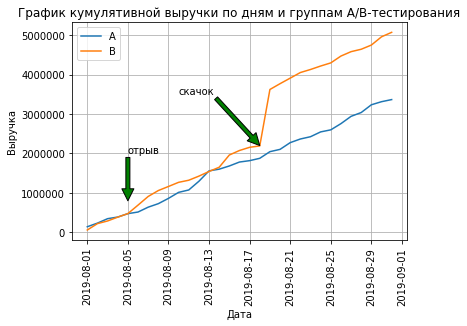

In [219]:
import matplotlib.pyplot as plt

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График кумулятивной выручки по дням и группам A/B-тестирования')
plt.legend()
plt.grid(True)
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.xticks(rotation=90)
plt.annotate('скачок', xy=('2019-08-18', 2200000), xytext=('2019-08-10', 3500000),
            arrowprops=dict(facecolor='g'))
plt.annotate('отрыв', xy=('2019-08-05', 800000), xytext=('2019-08-05', 2000000),
            arrowprops=dict(facecolor='g')) 
plt.show()

<div class="alert alert-block alert-warning">
    

__Комментарий от ревьюера №1 (нужно доделать)__

Проверь, пожалуйста, на всех графиках в проекте наличие заголовков и подписей осей. Не забудь давать заголовкам и подписям осознанные и понятные значения с указанием размерности (шт., млн. и т.д.). Желательно, чтобы заголовок и название осей были на одном языке.

</div>

**Вывод:**<br>
Группа А - выручка увеличивается равномерно.<br>
Группа В - выручка увеличивается, но после 17.08.2019 наблюдается резкий скачок - выброс в данных, рост цены или заказов.<br>

<span style="color:blue"> Добавил заголовки, подписи осей, а также аннотации

<div class="alert alert-block alert-success">
    

__Комментарий от ревьюера №2 (OK)__

👍
</div>

<div class="alert alert-block alert-warning">
    

__Комментарий от ревьюера №1 (можно лучше)__

На график можно было добавить аннотации для наглядности через такой код:  
<code>plt.annotate('скачок', xy=('2019-08-17', 2800000), xytext=('2019-08-10', 3500000),
            arrowprops=dict(facecolor='g'))
plt.annotate('отрыв', xy=('2019-08-05', 800000), xytext=('2019-08-05', 2000000),
            arrowprops=dict(facecolor='g')) </code>
</div>

**2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.**

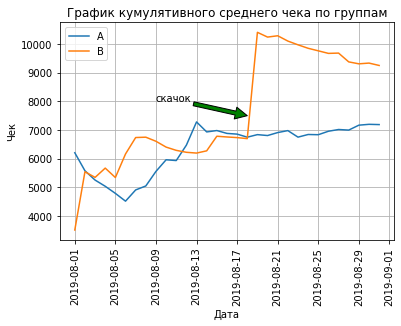

In [225]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('График кумулятивного среднего чека по группам')
plt.legend()
plt.grid(True)
plt.ylabel('Чек')
plt.xlabel('Дата')
plt.xticks(rotation=90)
plt.annotate('скачок', xy=('2019-08-18', 7500), xytext=('2019-08-09', 8000),
            arrowprops=dict(facecolor='g'))
plt.show()

<div class="alert alert-block alert-warning">
    

__Комментарий от ревьюера №1 (можно лучше)__

Чтобы убрать вывод текста перед графиком, можно использовать метод plt.show()

</div>

<span style="color:blue"> Исправил

**Вывод:**<br>
**Группа А:** в самом начале после 05.08.2019 заметен резкий спад, после которого наблюдается стремительный подъем, который достигает пика 13.08.2019. После этого средний чек стабилизировался на отметке +/- 7000.<br>
**Группа В:** резких спадов нет, средний чек растет скачками, но после 17.08.2019 также наблюдается резкий подъем с 7000 до 10000, после которого наблюдается падение до отметки приблизительно 9000.

**3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения**

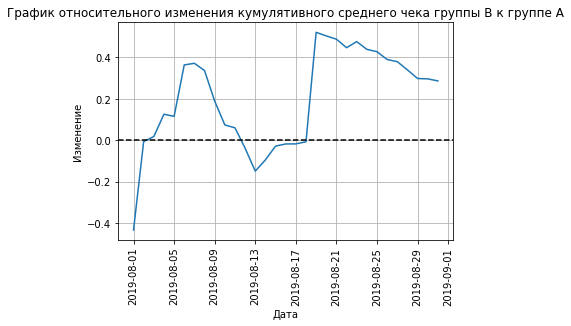

In [229]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.grid(True)
plt.xticks(rotation=90)

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.grid(True)
plt.ylabel('Изменение')
plt.xlabel('Дата')
plt.xticks(rotation=90)
plt.show()

**Вывод:**<br>
Все три графика выше имеют общую картину.<br>
График скачет в нескольких точках, скорее всего именно в эти даты присутствуют выбросы или необычно крупные заказы.

**4. Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.**

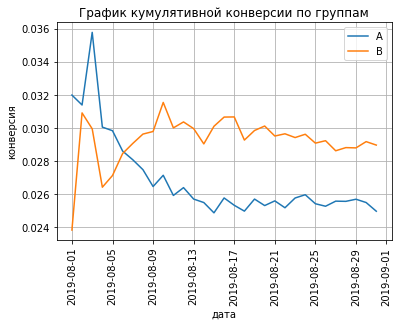

In [231]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('График кумулятивной конверсии по группам')
plt.ylabel('конверсия')
plt.xlabel('дата')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

**Вывод:**
Обе группы в начале показывают резкий скачок, но после этого конверсии стабилизировались на следующих уровнях:<br>
Группа А - на уровне 0.029 - 0.031<br>
Группа В - на уровне 0.033 - 0.036, она в отличие от группы А показала рост после снижения.

**5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения**

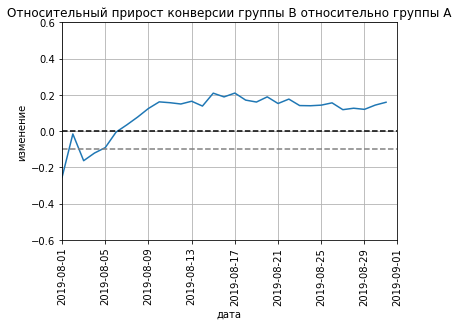

In [234]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.6, 0.6])
plt.title("Относительный прирост конверсии группы B относительно группы A")
plt.ylabel('изменение')
plt.xlabel('дата')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-block alert-warning">
    

__Комментарий от ревьюера №1 (можно лучше)__

Вот тут показывается ошибка из-за того, что в коде заявлена легенда, а ее на самом деле нет. Можно просто убрать строчку по легенде и ошибка пропадет.
</div>

<span style="color:blue"> Исправил

<div class="alert alert-block alert-success">
    

__Комментарий от ревьюера №2 (OK)__

👍
</div>

**Группа В показывает прирост до 20% относительно группы А по конверсии.**

<div class="alert alert-block alert-success">
    

__Комментарий от ревьюера №1 (OK)__

В целом задания по кумулятивным метрикам сделаны хорошо. Получены правильные выводы. Нужно только доделать визуализацию.
</div>

**6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения**

In [235]:
ordersByUsers = (
    orders.groupby(['visitorid', 'group'], as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)

ordersByUsers.columns = ['userId', 'group', 'orders']
display(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

,userId,group,orders
908,3967698036,A,3
55,249864742,B,3
478,2108163459,A,3
687,2988190573,A,3
890,3908431265,A,3
138,611059232,A,3
632,2742574263,B,3
157,678354126,A,2
323,1404560065,B,2
452,1985475298,B,2


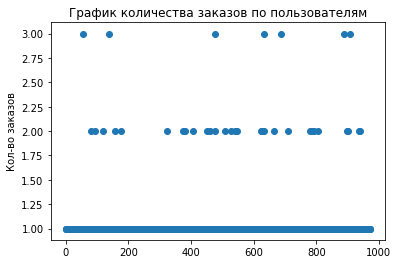

In [238]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.title('График количества заказов по пользователям')
plt.ylabel('Кол-во заказов')
plt.show()

**Вывод:**
Большинство покупателей совершают один заказ, но также много пользователей с 2-3 заказами.

**7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей**

In [239]:
print('95-й и 99-й перцентили количества заказов на пользователя:', np.percentile(ordersByUsers['orders'], [95, 99]))

95-й и 99-й перцентили количества заказов на пользователя: [1. 2.]


In [242]:
print('Максимальное кол-во заказов:', ordersByUsers['orders'].max())

Максимальное кол-во заказов: 3


<span style="color:blue"> После удаления пользователей, входящих в обе группы, расчеты изменились

**Вывод:**<br>
Не более 5% пользователей оформляли больше 1-го заказа. И только 1% пользователей заказывали более двух раз.<br>
Границей для определения аномальных пользователей выберем 3 заказа.

**8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.**

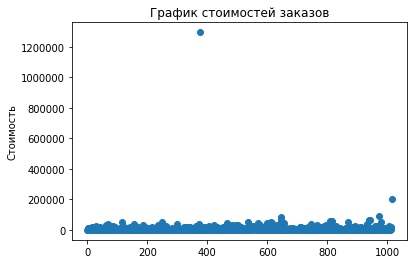

In [244]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('График стоимостей заказов')
plt.ylabel('Стоимость')
plt.show()

**Вывод:**
На графике видны два аномальных заказа - на суммы свыше 1 200 000 и 200 000, большинство же заказов до 100 000.<br>
Возможно эти едининчные выбросы являются оптовыми заказами от юр.лиц, которые и вызвали скачки на предыдущих рассмотренных графиках.<br>
Рассмотрим график стоимостей заказов, отсеяв заказы свыше 200 000.

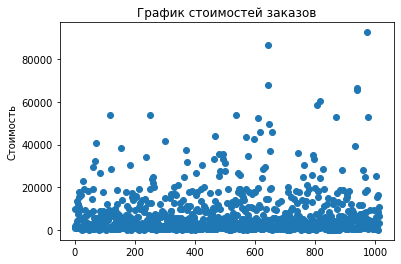

In [246]:
orders_1 = orders.query('revenue < 200000')
x_values = pd.Series(range(0,len(orders_1['revenue'])))
plt.scatter(x_values, orders_1['revenue'])
plt.title('График стоимостей заказов')
plt.ylabel('Стоимость')
plt.show()

**На графике без аномалий видно, что большинство заказов и вовсе на сумму не более 20000**

**9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов**

In [247]:
print('95-й и 99-й перцентили стоимости заказов:', np.percentile(orders['revenue'], [95, 99]))

95-й и 99-й перцентили стоимости заказов: [26785. 53904.]


**Вывод:**<br>
Не более 5% пользователей оформляли на сумму более чем 26 785. И только 1% пользователей заказывали более, чем на 53 904.<br>
Границей для определения аномальных пользователей выберем 30 000.

<div class="alert alert-block alert-success">
    

__Комментарий от ревьюера №1 (OK)__

Аномальные значения найдены верно.
</div>

**10. Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.**

Посчитаем статистическую значимость различий в конверсии и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.
Начнём с подготовки данных:

In [248]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(10))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280
5,2019-08-06,15,40919,23,214842,114,515332,112,690490,667,655,3985,3935
6,2019-08-07,16,123248,23,219164,130,638580,135,909654,644,709,4629,4644
7,2019-08-08,14,88639,22,150141,144,727219,157,1059795,610,654,5239,5298
8,2019-08-09,11,134237,19,103166,155,861456,176,1162961,617,610,5856,5908
9,2019-08-10,15,152275,22,105162,170,1013731,198,1268123,406,369,6262,6277


**Названия столбцов данных:**<br>
date — дата;<br>
ordersPerDateA — количество заказов в выбранную дату в группе A;<br>
revenuePerDateA — суммарная выручка в выбранную дату в группе A;<br>
ordersPerDateB — количество заказов в выбранную дату в группе B;<br>
revenuePerDateB — суммарная выручка в выбранную дату в группе B;<br>
ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;<br>
revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;<br>
ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;<br>
revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;<br>
visitorsPerDateA — количество пользователей в выбранную дату в группе A;<br>
visitorsPerDateB — количество пользователей в выбранную дату в группе B;<br>
visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;<br>
visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.<br>

Посчитаем статистическую значимость различия в конверсии между группами.<br>
Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [249]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов.<br> Тем, кто ничего не заказал, будут соответствовать нули.

In [250]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

<div class="alert alert-block alert-warning">
    

__Комментарий от ревьюера №1 (нужно доделать)__

Нужно сформулировать гипотезы перед каждым тестом, иначе что мы проверяем? Примерно так:  
1. Нулевая гипотеза: ...  
2. Обратная гипотеза: ...  
    
Так сторонний наблюдатель поймет что ты проверяешь.
    
А вот в [этой статье](https://ru.qwe.wiki/wiki/Null_hypothesis) можно почитать в целом о формулировании гипотез и как всё это дело началось)

</div>

<span style="color:blue">Сформулируем гипотезы:<br>
<span style="color:blue">1. Нулевая гипотеза: Конверсия между группам А и В не имеет статистически значимых различий<br>
2. Обратная гипотеза: Конверсия между группам А и В имеет статистически значимые различия

<div class="alert alert-block alert-warning">
    

__Комментарий от ревьюера №2 (можно лучше)__

Обрати внимание на формулировку твоих гипотез. Ты же проверяешь не просто конверсию в тестах, а средние значения конверсии в группах или медианы конверсии в группах, но в случае теста Манна-Уитни все немного сложнее.
    
Ты сравниваешь ранги каких-то значений между собой и это не конверсия и не средняя/медианная конверсия в группе. И в итоге нулевая гипотеза у тебя такая: Вероятность того, что наблюдение из популяции X превышает наблюдение из популяции Y равна 50%. А обратная гипотеза, что такая вероятность не равна 50%.

</div>

In [251]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative='two-sided')[1]))
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.011
0.160


**Вывод:**<br>
Первое число — p-value = 0.011 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем.<br>
Относительный выигрыш группы B равен 16% — второе число в выводе.<br>
Есть различия в конверсии по сырым данным между группами А и В.

**11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения**

<span style="color:blue">Сформулируем гипотезы:<br>
<span style="color:blue">1. Нулевая гипотеза: Средний чек между группам А и В не имеет статистически значимых различий<br>
2. Обратная гипотеза: Средний чек между группами А и В имеет статистически значимые различия

Чтобы рассчитать статистическую значимость различий в среднем чеке между сегментами, передадим критерию mannwhitneyu() данные о выручке с заказов.<br>
Найдём относительные различия в среднем чеке между группами:

In [252]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative='two-sided')[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.829
0.287


**Вывод:**<br>
P-value = 0.829, что больше 0.05. Не получилось отвергнуть нулевую гипотезу.<br>
Средний чек группы B выше среднего чека группы A - на 28,7%.

**12. Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения**

Примем за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 30 000 рублей.<br>
Так мы уберём пользователей с наибольшим числом заказов и пользователей с дорогими заказами.<br>

Сделаем срезы пользователей с числом заказов больше 3 — usersWithManyOrders и пользователей, совершивших заказы дороже 30 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.<br>

Узнаем, сколько всего аномальных пользователей методом shape().

In [253]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))

939    148427295
798    204675465
599    358944393
570    382846391
652    689129267
dtype: int64


In [254]:
print(abnormalUsers.shape)

(42,)


Всего 42 аномальных пользователя.<br>
Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным.<br>
Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [255]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

<span style="color:blue">Сформулируем гипотезы:<br>
<span style="color:blue">1. Нулевая гипотеза: Конверсия между группами А и В по "очищенным данным" не имеет статистически значимых различий<br>
2. Обратная гипотеза: Конверсия между группам А и В имеет статистически значимые различия

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [256]:
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative='two-sided')[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.013
0.161


**Вывод:**<br>
Результаты по конверсии практически не изменились.

**13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения**

<span style="color:blue">Сформулируем гипотезы:<br>
<span style="color:blue">1. Нулевая гипотеза: Средний чек между группам А и В по «очищенным» данным не имеет статистически значимых различий<br>
2. Обратная гипотеза: Средний чек между группами А и В по «очищенным» данным имеет статистически значимые различия

In [257]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'], alternative='two-sided',
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.842
-0.031


**Вывод:**<br>
P-value увеличился до 0.842. Не получилось отвергнуть нулевую гипотезу.<br>
Разница между сегментами изменилась - если раньше средний чек группы B был выше среднего чека группы A на 25,9%, **то теперь средний чек группы А выше среднего чека группы В на 3,1%.**

<div class="alert alert-block alert-warning">
    

__Комментарий от ревьюера №1 (можно лучше)__

Сделана хорошая работа в А/Б-тесте, но текущая версия библиотеки в проекте не поддерживает автоматическую проверку двухсторонней гипотезы. Для корректной работы метода необходимо задать его параметр alternative = 'two-sided'.

Подробнее о проверках можно почитать вот в этой [статье](http://www.stat.yale.edu/Courses/1997-98/101/sigtest.htm#:~:text=An%20alternative%20hypothesis%20may%20be,the%20direction%20does%20not%20matter.) 
</div>

<span style="color:blue"> Исправил.

**14. Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.**<br>
**ОБЩИЙ ВЫВОД**

На этапе предобработки данных сделаны следующие выводы:<br>
1. Дубликаты, пропуски, нулевые значения в предоставленных данных не обнаружены<br>
2. Заменен тип данных столбцов date на datetime<br>
3. Обнаружены и удалены 58 пользователей, встречающихся в обеих группах<br>

Данные были подготовлены к дальнейшему анализу.<br>

При применени фреймворка ICE наиболее приоритетной гипотезой является №8 (или 9, если считать 0 за 1) - "Запустить акцию, дающую скидку на товар в день рождения", на втором месте - № 0 (Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей), на третьем - №7 (Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок).<br>
После применения фреймворка RICE чуть другая картина - 1 место за № 7 (Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок), за ней идут гипотезы № 2 и 0 соответственно.<br>
Объясняется это тем, что при применении RICE учитывается охват (reach).<br>
<br>
Построив графики кумулятивной выручки, можно сделать вывод, что у Группы А - выручка увеличивается равномерно, а у Группы В - выручка также увеличивается, но после 17.08.2019 наблюдается резкий скачок - выброс в данных, рост цены или заказов.<br>

Построив графики кумулятивного среднего чека и график относительного изменения кумулятивного среднего чека группы B к группе A, можно сделать вывод, что все три графика имеют общую картину: график скачет в нескольких точках, скорее всего именно в эти даты присутствуют выбросы или необычно крупные заказы.<br>

Построив график относительного изменения кумулятивной конверсии группы B к группе A, видно, что Группа В показывает прирост до 20% относительно группы А по конверсии.<br>
Большинство покупателей совершают один заказ, но также много пользователей с 2-3 заказами.<br>

Посчитав 95-й и 99-й перцентили количества заказов на пользователя, получается что не более 5% пользователей оформляли больее **одного** заказа. И только 1% пользователей заказывали более двух раз. Границей для определения аномальных пользователей решено было выбрать 3 заказа.<br>

В данных присутствуют два аномальных заказа - на суммы свыше 1 200 000 и 200 000, большинство же заказов до 100 000. Возможно эти едининчные выбросы являются оптовыми заказами от юр.лиц, которые и вызвали скачки на предыдущих рассмотренных графиках. Отсеяв заказы свыше 200 000(без аномалий) можно сделать вывод, что большинство заказов и вовсе на сумму не более 20000.<br>
Посчитав 95-й и 99-й перцентили стоимости заказов, выбрали границу для определения аномальных заказов - 30 000, т.к. не более 5% пользователей оформляли на сумму более чем 26 785. И только 1% пользователей заказывали более, чем на 53 904.<br>

Посчитав статистическую значимость различий в конверсии между группами по «сырым» данным, сделали вывод, что есть различия в конверсии по сырым данным между группами А и В. (Относительный выигрыш группы B равен 16%). При аналогичном анализе по "очищенным" данным, результаты по конверсии практически не поменялись, а также обнаружены 42 аномальных пользователя.<br>

Статистическая значимость различий по среднему чеку:<br>
Сырые данные: Средний чек группы B выше среднего чека группы A - на 28,7%.<br>
Очищенные данные: Средний чек группы А выше среднего чека группы В на 3,1%.<br>
Связано такие изменение в среднем чеке с аномальными заказами в группе В - те самые на суммы 1200000 и 200000, т.к. результат изменился именно после того, как отфилтровали аномальные данные, что наглядно показывает влияние аномалий на результаты теста.<br>

**По результатам теста можно сделать следующие выводы:<br>**

**Тест можно остановить и зафиксировать победу группы В, т.к. у группы B больше конверсия и больше кумулятивная выручка.**<br>
**Но в то же время, у обеих групп после очистки данных от аномалий - практический одинаковый средний чек, это говорит о влиянии аномалий на результаты теста.**

<div class="alert alert-block alert-warning">
    

__Комментарий от ревьюера №1 (можно лучше)__

А почему ты делаешь вывод, что у группы B ниже средний чек? По результатам проверок найдены статистически значимые различия?
</div>

<span style="color:blue"> Пропустил 0 после запятой в результате и не перепроверил средний чек :) Исправил общий вывод.

<div class="alert alert-block alert-success">
    

__Комментарий от ревьюера №2 (OK)__

👍
</div>

<div class="alert alert-block alert-success">

__Комментарий от ревьюера по общему выводу №1 (можно лучше)__

Что сделано хорошо:  
— представлены основные выводы с этапов анализа;  
— выделены основные гипотезы для проверки;  
— есть вывод про А/Б-тест и победившую группу.  

Что можно было сделать лучше:  
— написать в выводе информацию с этапа предобработки, в каком у нас состоянии данные, всё ли с ними изначально было в порядке;    
</div>